In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
data_set=pd.read_csv("diabetes_prediction_dataset.csv")

In [5]:
training_data=data_set.loc[:89999]

In [6]:
testing_data=data_set.loc[90000:]

In [7]:
training_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
label_encoder=preprocessing.LabelEncoder()

In [9]:
testing_data.loc[:,["ogender"]]=testing_data["gender"]
testing_data.loc[:,["osmokingh"]]=testing_data["smoking_history"]

In [10]:
training_data.loc[:,["gender"]]=label_encoder.fit_transform(training_data.gender)

In [11]:
testing_data.loc[:,["gender"]]=label_encoder.fit_transform(testing_data.gender)

In [12]:
training_data.loc[:,["smoking_history"]]=label_encoder.fit_transform(training_data.smoking_history)

In [13]:
testing_data.loc[:,["smoking_history"]]=label_encoder.fit_transform(testing_data.smoking_history)

In [14]:
x_train=training_data.loc[:,training_data.columns!='diabetes']

In [15]:
x_train.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [16]:
y_train=training_data.loc[:,['diabetes']]

In [17]:
y_train

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
89995,0
89996,0
89997,1
89998,0


In [18]:
testing_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ogender,osmokingh
90000,1,56.0,1,0,4,31.77,6.1,140,0,Male,never
90001,0,63.0,0,0,5,27.32,6.6,90,0,Female,not current
90002,0,68.0,0,0,4,27.32,8.2,260,1,Female,never
90003,1,13.0,0,0,0,27.32,4.8,158,0,Male,No Info
90004,1,18.0,0,0,4,27.32,6.0,145,0,Male,never
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0,Female,No Info
99996,0,2.0,0,0,0,17.37,6.5,100,0,Female,No Info
99997,1,66.0,0,0,3,27.83,5.7,155,0,Male,former
99998,0,24.0,0,0,4,35.42,4.0,100,0,Female,never


In [19]:
x_test=testing_data.loc[:,["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"]]

In [20]:
x_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
90000,1,56.0,1,0,4,31.77,6.1,140
90001,0,63.0,0,0,5,27.32,6.6,90
90002,0,68.0,0,0,4,27.32,8.2,260
90003,1,13.0,0,0,0,27.32,4.8,158
90004,1,18.0,0,0,4,27.32,6.0,145
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [21]:
y_test=testing_data.loc[:,["diabetes"]]

In [22]:
y_test

,diabetes
90000,0
90001,0
90002,1
90003,0
90004,0
...,...
99995,0
99996,0
99997,0
99998,0


In [23]:
model=LinearRegression()

In [24]:
y_train=y_train.values.flatten()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
predicted_output=model.predict(x_test)

In [27]:
predicted_output=predicted_output.flatten()

In [28]:
predicted_output

array([ 0.2691931 ,  0.08197962,  0.6011222 , ...,  0.17090947,
       -0.12919797,  0.0441214 ])

In [29]:
output=pd.DataFrame({
    "gender":testing_data["ogender"],
    "age":x_test["age"],
    "hypertension":x_test["hypertension"],
    "heart_disease":x_test["heart_disease"],
    "smoking_history":testing_data["osmokingh"],
    "bmi":x_test["bmi"],
    "HbA1c_level":x_test["HbA1c_level"],
    "blood_glucose_level":x_test["blood_glucose_level"],
    "Actual Diabetes chance":y_test["diabetes"],
    "Predicted Diabetes Chance":predicted_output
    
    
})

In [30]:
output["error"]=output["Actual Diabetes chance"]-output["Predicted Diabetes Chance"]
output["sqerr"]=output["error"]**2
output["rms"]=np.sqrt(output["sqerr"])

            

In [31]:
overallrms=np.sqrt(output["rms"].mean())

In [32]:
print("The accuracy of the system is: ",overallrms)

The accuracy of the system is:  0.39355811489913123


In [33]:
output.to_csv("Diabetes Prediction_LogisticRegeression.csv",index=False)

<Axes: xlabel='Actual Diabetes chance', ylabel='Predicted Diabetes Chance'>

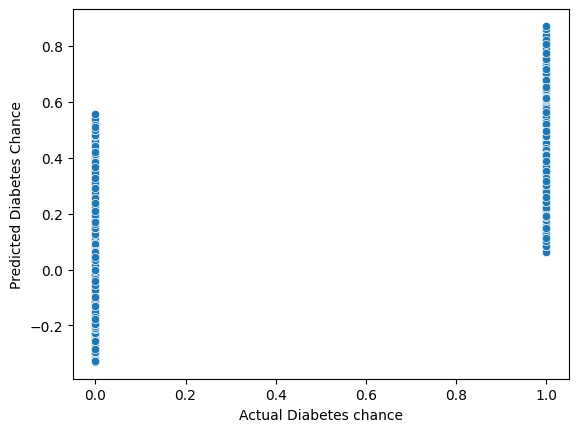

In [34]:
sns.scatterplot(output,x="Actual Diabetes chance",y="Predicted Diabetes Chance")

In [35]:
from sklearn import metrics

In [40]:
# metrics.accuracy_score(y_test,predicted_output)

In [41]:
index=range(1,10001)

In [42]:
index

range(1, 10001)

In [43]:
output["index"]=index

In [44]:
output

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Actual Diabetes chance,Predicted Diabetes Chance,error,sqerr,rms,index
90000,Male,56.0,1,0,never,31.77,6.1,140,0,0.269193,-0.269193,0.072465,0.269193,1
90001,Female,63.0,0,0,not current,27.32,6.6,90,0,0.081980,-0.081980,0.006721,0.081980,2
90002,Female,68.0,0,0,never,27.32,8.2,260,1,0.601122,0.398878,0.159104,0.398878,3
90003,Male,13.0,0,0,No Info,27.32,4.8,158,0,0.022371,-0.022371,0.000500,0.022371,4
90004,Male,18.0,0,0,never,27.32,6.0,145,0,0.106676,-0.106676,0.011380,0.106676,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,0.061260,-0.061260,0.003753,0.061260,9996
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,-0.040519,0.040519,0.001642,0.040519,9997
99997,Male,66.0,0,0,former,27.83,5.7,155,0,0.170909,-0.170909,0.029210,0.170909,9998
99998,Female,24.0,0,0,never,35.42,4.0,100,0,-0.129198,0.129198,0.016692,0.129198,9999


(0.0, 100.0)

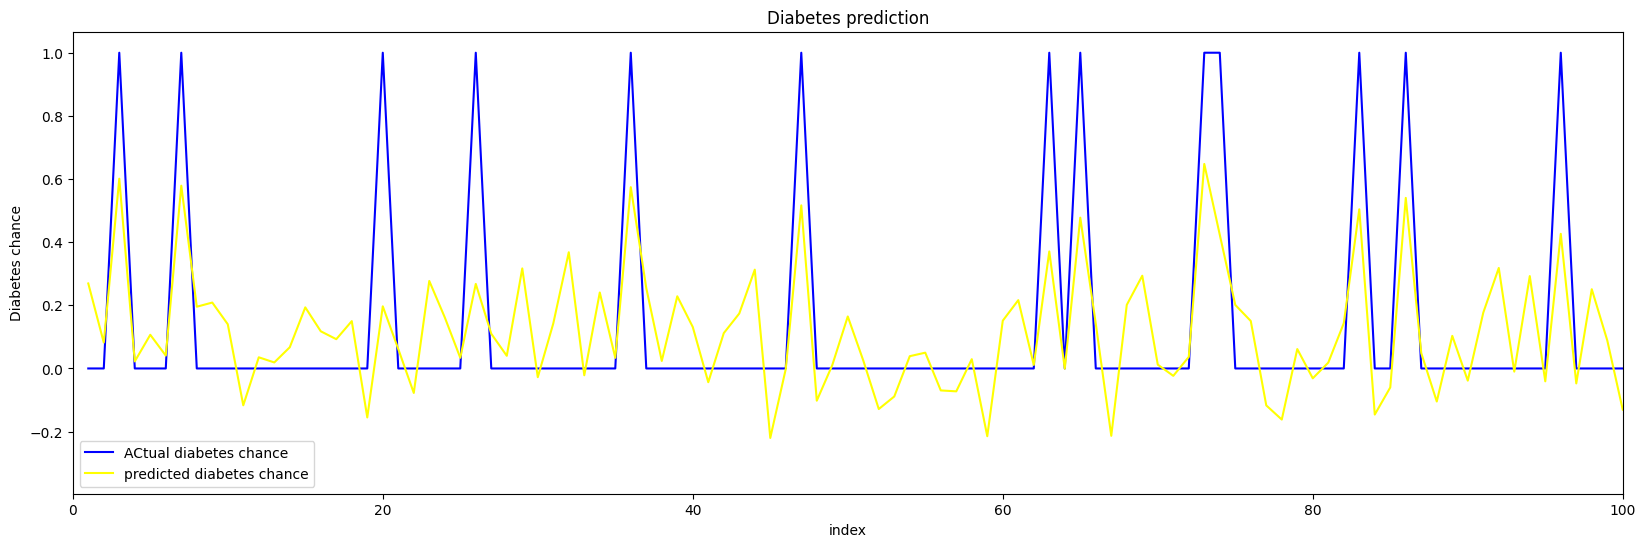

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.lineplot(output,x="index",y="Actual Diabetes chance",label="ACtual diabetes chance",color='blue')
sns.lineplot(output,x="index",y="Predicted Diabetes Chance",label="predicted diabetes chance",color='yellow')
plt.ylabel('Diabetes chance')
plt.title('Diabetes prediction')
plt.xlim(0,100)